# Foundations of Data Mining: Assignment 1
Suraj Iyer (0866094)<br>
Simin Chen (0842556)

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

## Handwritten digit recognition (5 points, 1+2+2)
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

Class label: 5


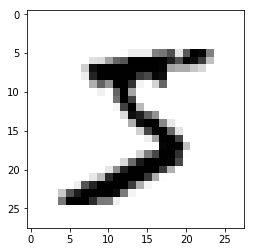

In [77]:
mnist_data = oml.datasets.get_dataset(554)  # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)  # Get the predictors X and the labels y
# REMOVE THIS LATER
X, y = X[:2000], y[:2000]
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.gray_r)  # Take the first example, reshape to a 28x28 image and plot
print("Class label:", y[0])  # Print the correct class label

- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?
- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.
- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?
    
Report all results clearly and interpret the results.  
Note: while prototyping/bugfixing, you can speed up experiments by taking a smaller sample of the data, but report your results as indicated above.

#### Evaluate a k-Nearest Neighbor classifier with its default settings

X_train: (1600, 784) | y_train: (1600,) | X_test: (400, 784) | y_test: (400,)
KNN score: 0.895000


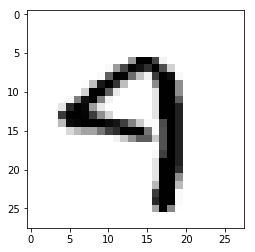

Predicted class label: 9 , True class label: 4


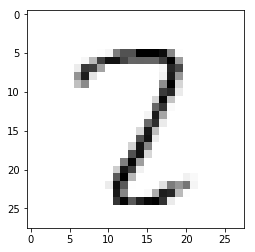

Predicted class label: 7 , True class label: 2


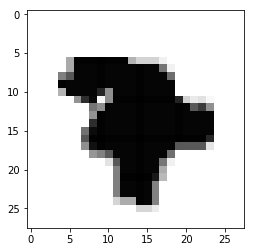

Predicted class label: 4 , True class label: 7


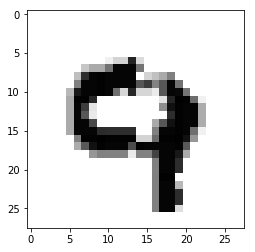

Predicted class label: 7 , True class label: 9


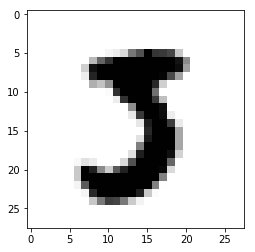

Predicted class label: 5 , True class label: 3


In [78]:
from sklearn import neighbors

X_train, X_test = np.split(X, [1600])
y_train, y_test = np.split(y, [1600])
print('X_train:', X_train.shape, '| y_train:', y_train.shape, '| X_test:', X_test.shape, '| y_test:', y_test.shape)

# Predictive accuracy
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

# Finding a few misclassifications
X_misc = [(X_test[i], y, y_test[i]) for i, y in enumerate(knn.predict(X_test)) if y != y_test[i]]
for x, y_pred, y_true in X_misc[:5]:
    plt.imshow(x.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.show()
    print("Predicted class label:", y_pred, ", True class label:", y_true)

#### Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data

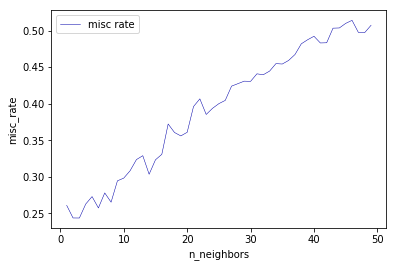

In [79]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score

# Build a list of the training and test scores for increasing k
misc_rate = []
k = range(1, 50)

# Get 10% of the data
X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.1, random_state=66)

for n_neighbors in k:
    # build the model
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    misc_rate.append(1.-np.mean(scores))

# plot the data
plt.plot(k, misc_rate, label="misc rate")
plt.ylabel("misc_rate")
plt.xlabel("n_neighbors")
_ = plt.legend()

#### Doing the same as above but with 100 bootstrapping repeats.

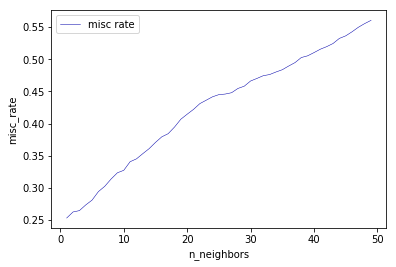

In [80]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=100, train_size=0.66, test_size=0.34, random_state=66)

# Build a list of the training and test scores for increasing k
misc_rate = []
k = range(1, 50)

# Get 10% of the data
X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.1, random_state=66)

for n_neighbors in k:
    # build the model
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(clf, X_train, y_train, cv=sss, n_jobs=-1)
    misc_rate.append(1-np.mean(scores))

# plot the data
plt.plot(k, misc_rate, label="misc rate")
plt.ylabel("misc_rate")
plt.xlabel("n_neighbors")
_ = plt.legend()

#### Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score

# Get 10% of the data
X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.1, random_state=66)

# Build the models
logistic, svc = LogisticRegression(), LinearSVC()
# logistic_model, svc_model = logistic.fit(X_train, y_train), svc.fit(X_train, y_train)
# print('LogisticRegression score: %f' % logistic_model.score(X_test, y_test))
# print('LinearSVC score: %f' % svc_model.score(X_test, y_test))

for clf in [logistic, svc]:
    scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    print('%s Mean cross-validation score: %f' % (clf.__class__.__name__, np.mean(scores)))

LogisticRegression Mean cross-validation score: 0.811174
LinearSVC Mean cross-validation score: 0.800494


#### Optimizing for the degree of regularization ($C$) and choice of penalty (L1/L2).

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

LogisticRegression score: 0.882353


([<matplotlib.axis.XTick at 0x2621cc2f278>,
 <a list of 6 Text xticklabel objects>)

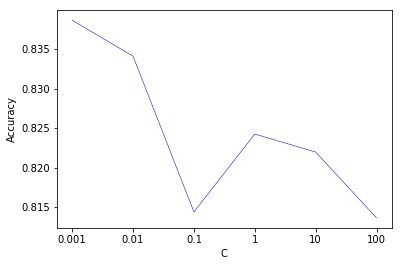

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

LogisticRegression score: 0.860294


([<matplotlib.axis.XTick at 0x2621cc29eb8>,
 <a list of 6 Text xticklabel objects>)

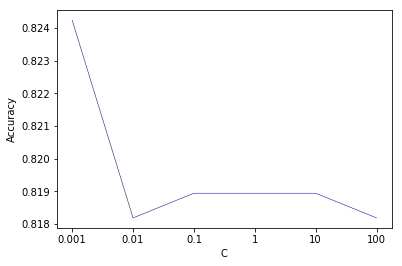

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

LinearSVC score: 0.848529


([<matplotlib.axis.XTick at 0x2621cc3b3c8>,
 <a list of 6 Text xticklabel objects>)

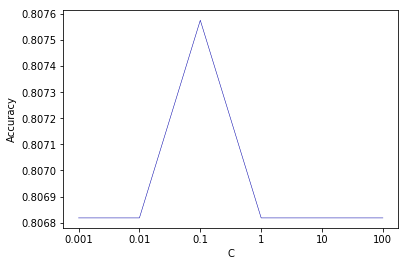

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.66, random_state=66)

# Build the models
logistic_l1, logistic_l2, svc = LogisticRegression(penalty='l1'), LogisticRegression(penalty='l2'), LinearSVC()
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

for clf in [logistic_l1, logistic_l2, svc]:
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print('%s score: %f' % (clf.__class__.__name__, score))
    plt.xlabel('C')
    plt.xticks(np.arange(len(param_grid['C'])), param_grid['C'])
    plt.ylabel('Accuracy')
    plt.plot(np.arange(len(param_grid['C'])), grid_search.cv_results_['mean_test_score'])
    plt.show()

## Model selection (4 points (2+2))
Study how RandomForest hyperparameters interact on the Ionosphere dataset (OpenML ID 59).

- Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time. Use a nested cross-validation and a grid search (or random search) over the possible values, and measure the AUC. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal AUC performance you find?
- Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow AUC$ with AUC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Hint: Running this experiment can take a while, so start early and use a feasible grid/random search. Start with a coarse grid or few random search iterations.
Hint: Use a log scale (1,2,4,8,16,...) for $n\_estimators$. Vary $max\_features$ linearly between 1 and the total number of features. Note that, if you give $max\_features$ a float value, it will use it as [the percentage of the total number of features](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [3]:
from sklearn.ensemble import RandomForestClassifier

ionosphere = oml.datasets.get_dataset(59)  # Download Ionosphere data
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute)  # Get the predictors X and the labels y
X.shape, y.shape

((351, 34), (351,))

Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time using a nested cross-validation and a randomized search.

In [6]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [2**i for i in range(0,12)],
    'max_features': np.arange(1, X.shape[1]+1, 3)
}
grid_search = RandomizedSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_iter=20, n_jobs=-1)
scores = cross_val_score(grid_search, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print('Scores:', scores)
print('Mean cross-validation score:', scores.mean())

Scores: [ 0.98   0.968  0.948  1.     0.996]
Mean cross-validation score: 0.978379487179


Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34]), 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

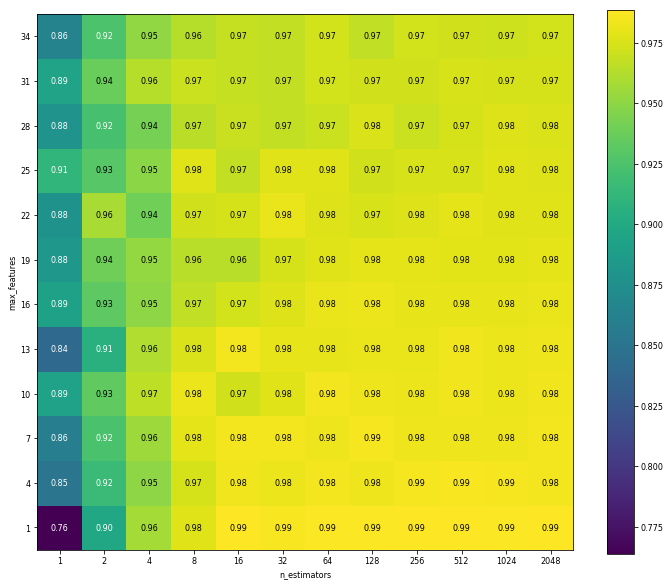

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, _, y_train, _ = train_test_split(X, y, stratify=y, train_size=.66, random_state=66)
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [2**i for i in range(0,12)],
    'max_features': np.arange(1, X.shape[1]+1, 3)
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_
scores = np.array(results['mean_test_score']).reshape(len(param_grid['max_features']), len(param_grid['n_estimators']))

# Display the heatmap
plt.rcParams['figure.figsize'] = (12., 10.)
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'], 
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis")
plt.rcParams['figure.figsize'] = (6., 4.)

## Decision tree heuristics (1 point)
Consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

Learn a decision tree:

- Implement functions to calculate entropy and information gain
- What is the class entropy for the entire dataset? What is the information gain when you split the data using the *Water* feature?
- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).
- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"Sky": ['sunny', 'sunny', 'rainy', 'sunny', 'sunny'],
                   "AirTemp": ['warm', 'warm', 'warm', 'cold', 'warm'],
                   "Humidity": ['normal', 'high', 'high', 'high', 'normal'],
                   "Wind": ['strong', 'strong', 'strong', 'strong', 'weak'],
                   "Water": ['warm', 'warm', 'cool', 'warm', 'warm'],
                   "Forecast": ['same', 'same', 'change', 'change', 'same'],
                   "Date?": ['yes', 'yes', 'no', 'yes', 'no']
                   })
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']]  # Fix column ordering
df  # print

# One-hot encode
cols_to_transform = ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']
df1 = pd.get_dummies(df, columns=cols_to_transform)
df1.drop(['Sky_rainy', 'AirTemp_cold', 'Humidity_high', 'Wind_strong', 
          'Water_cool', 'Forecast_change', 'Date?_no'], axis=1, inplace=True)
df1

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


,Sky_sunny,AirTemp_warm,Humidity_normal,Wind_weak,Water_warm,Forecast_same,Date?_yes
0,1,1,1,0,1,1,1
1,1,1,0,0,1,1,1
2,0,1,0,0,0,0,0
3,1,0,0,0,1,0,1
4,1,1,1,1,1,1,0


In [4]:
# Complete these functions first
# pos and neg are the number of positive and negative samples in a node
def entropy(pos, neg):
    if pos <= 0 or neg <= 0:
        return 0
    p = pos/(pos+neg)
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

# pos1 and pos2 are the number of positive examples in each branch after the split. 
# Same for neg1 and neg2 
def info_gain(pos1, neg1, pos2, neg2):
    pos, neg = pos1 + neg1, pos2 + neg2
    E_before = entropy(pos1+pos2, neg1+neg2)
    E_after = (pos * entropy(pos1, neg1) + neg * entropy(pos2, neg2))/ (pos+neg)
    return E_before - E_after

#### What is the class entropy for the entire dataset? What is the information gain when you split the data using the Water feature?

In [5]:
pos1 = len(df1[df1['Date?_yes']==1])
neg1 = len(df1[df1['Date?_yes']==0])
E = entropy(pos1, neg1)  # class entropy of entire dataset

pos2 = len(df1[(df1['Water_warm']==0) & (df1['Date?_yes']==1)])
neg2 = len(df1[(df1['Water_warm']==0) & (df1['Date?_yes']==0)])
pos3 = len(df1[(df1['Water_warm']==1) & (df1['Date?_yes']==1)])
neg3 = len(df1[(df1['Water_warm']==1) & (df1['Date?_yes']==0)])

IG = info_gain(pos2, neg2, pos3, neg3)
print('Information gain:', IG)

Information gain: 0.321928094887


#### Implement a basic decision tree

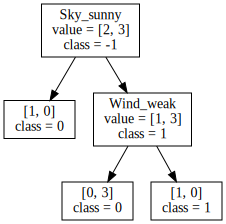

In [38]:
from graphviz import Digraph

def create_tree(df, features=None, dot=Digraph(), parent=None, sclass=-1, depth=0):
    global i
    if features is None:
        features = list(df)
        features.remove('Date?_yes')
    max_IG, best_f = -1, -1
    node_id = str(i)
    i+=1
    
    # stop when count of either class is zero
    pos1 = len(df[df['Date?_yes']==1])
    neg1 = len(df[df['Date?_yes']==0])
    E = entropy(pos1, neg1)  # class entropy of entire dataset
    if E == 0:
        # display nodes
        dot.node(node_id, '[%d, %d] \n class = %d' % (neg1, pos1, sclass))
        if parent:
            dot.edge(parent, node_id)
        return

    # find the best splitting feature
    for f in features:
        pos2 = len(df[(df[f]==0) & (df['Date?_yes']==1)])
        neg2 = len(df[(df[f]==0) & (df['Date?_yes']==0)])
        pos3 = len(df[(df[f]==1) & (df['Date?_yes']==1)])
        neg3 = len(df[(df[f]==1) & (df['Date?_yes']==0)])
        
        IG = info_gain(pos2, neg2, pos3, neg3)
        if IG > max_IG:
            max_IG = IG
            best_f = f
    
    # stop if gain is zero
    if max_IG <= 0:
        # display nodes
        dot.node(node_id, '[%d, %d] \n class = %d' % (neg1, pos1, sclass))
        if parent:
            dot.edge(parent, node_id)
        return
    
    # split on that feature | display nodes
    dot.node(node_id, '%s \n value = [%d, %d] \n class = %d' % (best_f, neg1, pos1, sclass))
    if parent:
        dot.edge(parent, node_id)
    features.remove(best_f)
    create_tree(df[df[best_f] == 0], features, dot, node_id, sclass=0, depth=depth+1)
    create_tree(df[df[best_f] == 1], features, dot, node_id, sclass=1, depth=depth+1)
    
    return dot

# Create the tree and display the graph
i=0
g = Digraph(name='Decision Tree', node_attr={'shape': 'rectangle'})
display(create_tree(df1, dot=g))

#### Train a scikit-learn decision tree on the same data

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best')

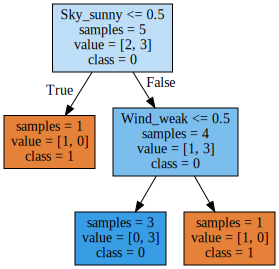

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# build a tree model
X, y = df1.drop('Date?_yes', axis=1), df1['Date?_yes']
clf = DecisionTreeClassifier(criterion='entropy', random_state=10)
clf.fit(X, y)

# Creates a .dot file
export_graphviz(clf, out_file="tree.dot", class_names=['1', '0'], 
                feature_names=list(X), impurity=False, filled=True)

# Open and display
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Random Forests (4 points (1+1+2))
Study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.
* Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error. Compare the two. What do you learn from this?
* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

Hint: Error rate = 1 - accuracy. It is not a standard scoring metric for cross_val_score, so you'll need to let it compute the accuracy values, and then compute the mean error rate yourself.  
Hint: We discussed bias-variance decomposition in class. It is not included in scikit-learn, so you'll need to implement it yourself. Always first calculate the bias and variance of each sample individually, and then sum them up.

In [3]:
from sklearn import ensemble
eeg = oml.datasets.get_dataset(1471)  # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute)

#### Plot the Out-Of-Bag error against the number of trees.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=True, random_state=66,
            verbose=0, warm_start=True)

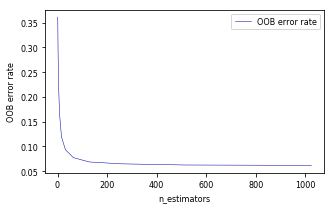

In [44]:
# Out of bag errors can be retrieved from the RandomForest classifier. You'll need to loop over the number of trees.
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
clf = ensemble.RandomForestClassifier(warm_start=True, oob_score=True, random_state=66)
n_estimators = [2**i for i in range(0,11)]
results = []

for i in n_estimators:
    clf.set_params(n_estimators=i)
    clf.fit(X, y)
    results.append(1 - clf.oob_score_)
    
# plot the data
plt.plot(n_estimators, results, label="OOB error rate")
plt.ylabel("OOB error rate")
plt.xlabel("n_estimators")
_ = plt.legend()

#### Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

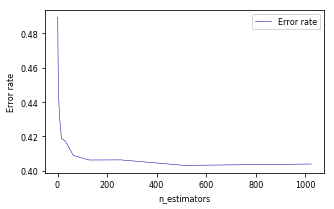

In [45]:
from sklearn.model_selection import cross_val_score

clf = ensemble.RandomForestClassifier(random_state=66)
n_estimators = [2**i for i in range(0,11)]
results = []

for i in n_estimators:
    clf.set_params(n_estimators=i)
    scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    results.append(1 - scores.mean())
    
# plot the data
plt.plot(n_estimators, results, label="Error rate")
plt.ylabel("Error rate")
plt.xlabel("n_estimators")
_ = plt.legend()

#### Compare the performance of the RandomForest ensemble with that of a single full decision tree.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def bias(y_true, y_predicted):
    pass

def variance(y_predicted):
    pass

clf = ensemble.RandomForestClassifier(random_state=66)
n_estimators = [2**i for i in range(0,11)]
results = []

for i in n_estimators:
    clf.set_params(n_estimators=i)
    scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc', n_jobs=-1)
    results.append(scores.mean())

print(results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1024, n_jobs=1, oob_score=False, random_state=66,
            verbose=0, warm_start=False)

[0.50601512212644839, 0.51482570498528468, 0.5410695032440771, 0.556838614647574, 0.57209375304098264, 0.57421617922553447, 0.57486498298877142, 0.57911048516463925, 0.57760203572790458, 0.57887718784589226, 0.57803044415354188]


## A regression benchmark (1 point)
Consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

- Take a selection of the algorithms that we covered in class that can do regression.
- Based on what you learned in the previous exercises, make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

Hint: mean squared error (MSE) is a standard scoring technique in GridSearchCV and cross_val_score. You'll have to compute the square roots yourself. Of course, during a grid search you can just use MSE, the optimal hyperparameter values will be the same.

In [ ]:
liver = oml.datasets.get_dataset(8)  # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute)